In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [54]:
# Download cleaned file
url = 'https://drive.usercontent.google.com/download?id=19qY6F3o63tZ01YbC3SKOQKPRwbDx5yFT&export=download&authuser=0&confirm=t'
df = pd.read_csv(url, on_bad_lines='skip')

In [55]:
# Balance the dataset to be 50/50 for status 0 and 1
status_1_sample = df[df['status']==1].sample(10_000)
status_0_sample = df[df['status']==0].sample(10_000)

full = pd.concat([status_0_sample, status_1_sample])
full

,crimeTheft,crimeViolence,crimeSexual,crimeDamage,crimeChild,crimeFraud,crimeWeapon,crimeViolation,crimeKidnap,weaponHuman,weaponGun,weaponMachine,weaponNone,weaponVerbal,weaponChemical,sitePublicArea,siteStoreRestaurant,sitePublicTransport,sitePrivateTransport,sitePrivateHome,siteAthletic,siteSchoolHospital,sitePrivateProperty,siteOnline,reportDelay,reportTimely,lat,lon,crimeCountTotal,crimeCountSixMonths,crimeDensity,crimeDensitySixMonths,crimeDensityCategory,arrestRatio,status,ami_catego,victimSex_f,victimSex_m,victimSex_x,victimDescentCategory_asian,victimDescentCategory_black,victimDescentCategory_hispanic,victimDescentCategory_native,victimDescentCategory_other,victimDescentCategory_pacific islander,victimDescentCategory_unknown,victimDescentCategory_white,victimAge_adult,victimAge_minor,victimAge_senior,victimAge_unknown
840650,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,34.1722,-118.5037,3041,106,1.344980,0.046882,low,0.244656,0,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
2581657,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,1,33.9274,-118.2761,3660,103,3.922830,0.110397,high,0.208470,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0
1922442,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,118,0,34.0334,-118.3438,5440,201,4.096386,0.151355,high,0.214154,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2411968,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,36,0,33.9656,-118.2827,6140,251,4.363895,0.178394,high,0.259609,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
906919,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,32,0,34.1504,-118.4699,3616,147,1.776904,0.072236,medium,0.232024,0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747913,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,1,34.0261,-118.4126,1376,38,1.126945,0.031122,low,0.164971,1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0
1610212,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,-1,1,34.0691,-118.2759,3877,143,2.375613,0.087623,medium,0.272376,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0
1229220,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,1,34.0799,-118.3068,3288,144,2.595107,0.113654,medium,0.241788,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1760748,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,1,34.0617,-118.3048,4557,139,3.588189,0.109449,medium,0.233706,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [56]:
# Reduce dataframe to just these columns (open to experimentation)
reduced_cols = ['crimeTheft', 'lat', 'lon', 'crimeCountTotal', 'crimeDensitySixMonths', 'crimeCountSixMonths', 'crimeDensity', 'reportDelay', 'crimeViolence', 'weaponHuman', 'ami_catego', 'sitePrivateHome', 'crimeDamage', 'crimeWeapon', 'sitePublicArea', 'arrestRatio', 'status']
full = full[reduced_cols]
full

,crimeTheft,lat,lon,crimeCountTotal,crimeDensitySixMonths,crimeCountSixMonths,crimeDensity,reportDelay,crimeViolence,weaponHuman,ami_catego,sitePrivateHome,crimeDamage,crimeWeapon,sitePublicArea,arrestRatio,status
840650,1,34.1722,-118.5037,3041,0.046882,106,1.344980,1,0,0,2,0,0,0,1,0.244656,0
2581657,1,33.9274,-118.2761,3660,0.110397,103,3.922830,-1,0,0,1,1,0,0,0,0.208470,0
1922442,0,34.0334,-118.3438,5440,0.151355,201,4.096386,118,1,0,1,1,0,0,0,0.214154,0
2411968,0,33.9656,-118.2827,6140,0.178394,251,4.363895,36,0,0,0,0,0,0,1,0.259609,0
906919,1,34.1504,-118.4699,3616,0.072236,147,1.776904,32,0,0,4,1,0,0,0,0.232024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747913,0,34.0261,-118.4126,1376,0.031122,38,1.126945,-1,1,1,2,0,0,0,1,0.164971,1
1610212,1,34.0691,-118.2759,3877,0.087623,143,2.375613,-1,0,0,1,0,0,0,1,0.272376,1
1229220,0,34.0799,-118.3068,3288,0.113654,144,2.595107,-1,1,1,1,0,0,0,1,0.241788,1
1760748,0,34.0617,-118.3048,4557,0.109449,139,3.588189,-1,1,1,1,0,0,0,0,0.233706,1


In [57]:
# Split data into X and y (features and target variable)
X = full.drop(columns=['status'])
y = full['status']

# Split into train/test sets
# 'stratify' makes sure that the ratio of 1s to 0s is maintained in the split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [58]:
# Scale data with StandardScaler

#scale_columns = ['lat', 'lon', 'crimeCountTotal', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'reportDelay']
scale_columns = ['lat', 'lon', 'crimeCountTotal', 'crimeCountSixMonths', 'crimeDensity', 'crimeDensitySixMonths', 'reportDelay', 'arrestRatio']

scaler = StandardScaler()
scaler.fit(X_train[scale_columns])
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[scale_columns] = scaler.transform(X_train[scale_columns])
X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

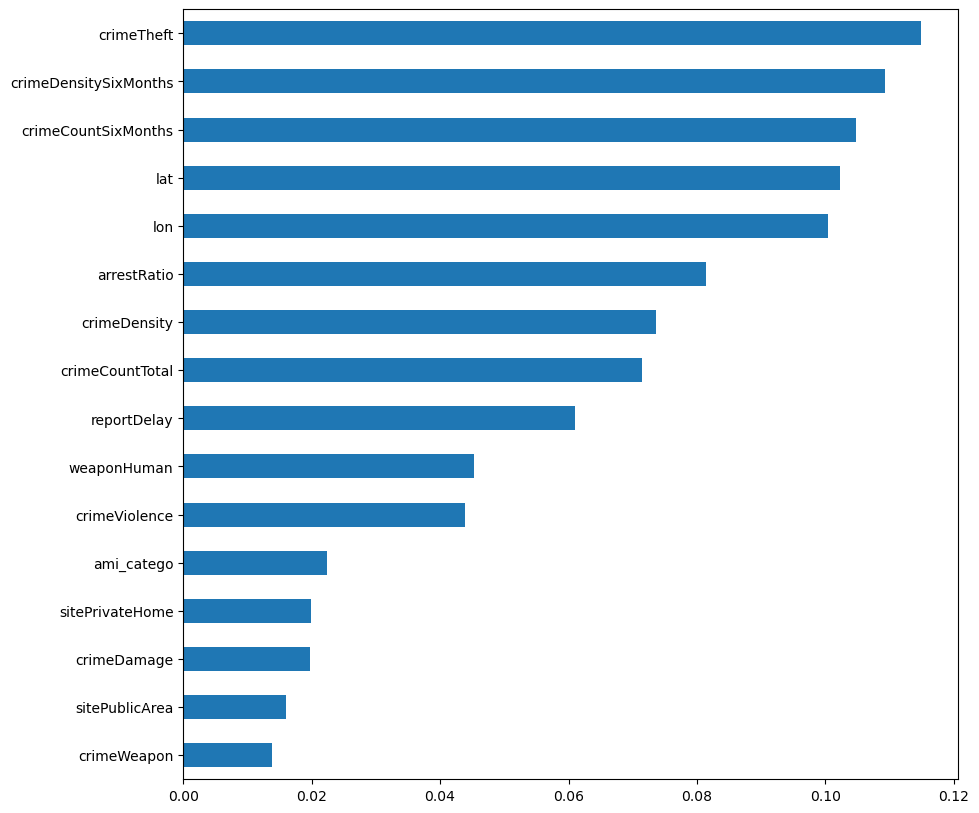

In [59]:
# See feature importance
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names)
feature_importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 10))
plt.show()

In [61]:
# Try RandomForest with different criterion arguments
for criterion in ['gini', 'entropy', 'log_loss']:
    for estimators in [16, 32, 64, 128, 256]:
        model = RandomForestClassifier(n_estimators=estimators, criterion=criterion)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        print(f'Criterion: {criterion} - Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Criterion: gini - Estimators: 16 - Accuracy: 0.7132
Criterion: gini - Estimators: 32 - Accuracy: 0.7174
Criterion: gini - Estimators: 64 - Accuracy: 0.7238
Criterion: gini - Estimators: 128 - Accuracy: 0.7252
Criterion: gini - Estimators: 256 - Accuracy: 0.7274
Criterion: entropy - Estimators: 16 - Accuracy: 0.7116
Criterion: entropy - Estimators: 32 - Accuracy: 0.7168
Criterion: entropy - Estimators: 64 - Accuracy: 0.7278
Criterion: entropy - Estimators: 128 - Accuracy: 0.7284
Criterion: entropy - Estimators: 256 - Accuracy: 0.7268
Criterion: log_loss - Estimators: 16 - Accuracy: 0.7088
Criterion: log_loss - Estimators: 32 - Accuracy: 0.717
Criterion: log_loss - Estimators: 64 - Accuracy: 0.7248
Criterion: log_loss - Estimators: 128 - Accuracy: 0.7274
Criterion: log_loss - Estimators: 256 - Accuracy: 0.7282


In [62]:
# Try SVC with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)  # or 'rbf' for non-linear
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Kernel: {kernel} - Accuracy: {accuracy_score(y_test, preds)}')

Kernel: linear - Accuracy: 0.7368
Kernel: poly - Accuracy: 0.7434
Kernel: rbf - Accuracy: 0.742
Kernel: sigmoid - Accuracy: 0.592


In [63]:
# Try XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.728

In [64]:
# Try AdaBoost with different estimators
from sklearn.ensemble import AdaBoostClassifier
for estimators in [16, 32, 64, 128, 256]:
    model = AdaBoostClassifier(n_estimators=estimators, algorithm='SAMME')
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 16 - Accuracy: 0.748
Estimators: 32 - Accuracy: 0.746
Estimators: 64 - Accuracy: 0.7454
Estimators: 128 - Accuracy: 0.7466
Estimators: 256 - Accuracy: 0.7464


In [65]:
# Try ExtraTrees with different estimators
from sklearn.ensemble import ExtraTreesClassifier
for estimators in [16, 32, 64, 128, 256]:
    model = ExtraTreesClassifier(n_estimators=estimators)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    print(f'Estimators: {estimators} - Accuracy: {accuracy_score(y_test, preds)}')

Estimators: 16 - Accuracy: 0.6966
Estimators: 32 - Accuracy: 0.6992
Estimators: 64 - Accuracy: 0.7022
Estimators: 128 - Accuracy: 0.7006
Estimators: 256 - Accuracy: 0.6966


In [66]:
# Try Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, preds)}')

Accuracy: 0.7274


In [67]:
# Ensembling via democracy
# Multiple models make predictions
# All models 'vote' on predictions
# Slight improvement to accuracy

rf = RandomForestClassifier(n_estimators=256, criterion='log_loss')
svc = SVC(kernel='rbf')
xgb = XGBClassifier()
ada = AdaBoostClassifier(n_estimators=128, algorithm='SAMME')
gnb = GaussianNB()


all_preds = []
for model in [rf, svc, xgb, ada, gnb]:
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    all_preds.append(preds)

summed_preds = np.sum(all_preds, axis=0)
for i in range(1,6):
    summed_preds_x = np.where(summed_preds >= i, 1, 0)
    print(f'Must match {i}: {accuracy_score(y_test, summed_preds_x)}')

Must match 1: 0.7314
Must match 2: 0.7488
Must match 3: 0.749
Must match 4: 0.7372
Must match 5: 0.7074
